# Part I - (Ford GoBike System data)
## by Abdulmohsen Ali Albareed

## Introduction
> The Ford GoBike system dataset provides anonymized, timestamped data about the start- and end- station for a bike, the user type (subscriber or casual rider), as well as some customer-reported attributes like birth year and gender. If you’re already familiar with the CitiBike NYC or RideIndego datasets, the Ford GoBike dataset is similarly structured.



## Preliminary Wrangling


In [2]:
!pip install geopy

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math
import geopy.distance
import calendar


%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [4]:
df = pd.read_csv('fordgobike-tripdata.csv')

In [5]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

### Convert the data type of start_time and end_time

In [7]:
df['start_time']=pd.to_datetime(df['start_time'])

In [8]:
df['end_time']=pd.to_datetime(df['end_time'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

### extract the minutes from seconds duration

In [10]:
df['duration_min']=df['duration_sec']//60

In [11]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,869
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,708
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,1030
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,608
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,26


### drop unnecessary columns

In [12]:
columns=['bike_id','start_station_id','end_station_id','duration_sec']
df.drop(columns=columns,inplace=True)
df.head()

,start_time,end_time,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,Commercial St at Montgomery St,37.794231,-122.402923,Customer,1984.0,Male,No,869
1,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,The Embarcadero at Steuart St,37.791464,-122.391034,Berry St at 4th St,37.775880,-122.393170,Customer,NaN,NaN,No,708
2,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,37.769305,-122.426826,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,Customer,1972.0,Male,No,1030
3,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,37.774836,-122.446546,Central Ave at Fell St,37.773311,-122.444293,Subscriber,1989.0,Other,No,608
4,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,37.804562,-122.271738,10th Ave at E 15th St,37.792714,-122.248780,Subscriber,1974.0,Male,Yes,26


In [13]:
df.duplicated().sum()

0

In [14]:
df.start_time.unique()

array(['2019-02-28T17:32:10.145000000', '2019-02-28T18:53:21.789000000',
       '2019-02-28T12:13:13.218000000', ...,
       '2019-02-01T00:06:05.549000000', '2019-02-01T00:05:34.360000000',
       '2019-02-01T00:00:20.636000000'], dtype='datetime64[ns]')

### extract the year and month and day name from start date

In [15]:
df['year'] = df['start_time'].dt.year.astype(int)

df['month'] = df['start_time'].dt.month.astype(int)

df['day_name'] = df['start_time'].dt.day_name()

In [16]:
df.head()

,start_time,end_time,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,year,month,day_name
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,Commercial St at Montgomery St,37.794231,-122.402923,Customer,1984.0,Male,No,869,2019,2,Thursday
1,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,The Embarcadero at Steuart St,37.791464,-122.391034,Berry St at 4th St,37.775880,-122.393170,Customer,NaN,NaN,No,708,2019,2,Thursday
2,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,37.769305,-122.426826,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,Customer,1972.0,Male,No,1030,2019,2,Thursday
3,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,37.774836,-122.446546,Central Ave at Fell St,37.773311,-122.444293,Subscriber,1989.0,Other,No,608,2019,2,Thursday
4,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,37.804562,-122.271738,10th Ave at E 15th St,37.792714,-122.248780,Subscriber,1974.0,Male,Yes,26,2019,2,Thursday


### write a fuction that calucalte the distance from start point to end point 

In [17]:
 def dist_caluclate(row):
    start = (row['start_station_latitude' ], row['start_station_longitude'])
    stop = (row['end_station_latitude'], row['end_station_longitude'])
    return geopy.distance.geodesic(start, stop).km

In [18]:
df['distance_km'] = df.apply (lambda row: dist_caluclate (row), axis=1)

In [19]:
df.head()

,start_time,end_time,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,year,month,day_name,distance_km
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,Commercial St at Montgomery St,37.794231,-122.402923,Customer,1984.0,Male,No,869,2019,2,Thursday,0.543983
1,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,The Embarcadero at Steuart St,37.791464,-122.391034,Berry St at 4th St,37.775880,-122.393170,Customer,NaN,NaN,No,708,2019,2,Thursday,1.739909
2,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,37.769305,-122.426826,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,Customer,1972.0,Male,No,1030,2019,2,Thursday,2.705390
3,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,37.774836,-122.446546,Central Ave at Fell St,37.773311,-122.444293,Subscriber,1989.0,Other,No,608,2019,2,Thursday,0.260896
4,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,37.804562,-122.271738,10th Ave at E 15th St,37.792714,-122.248780,Subscriber,1974.0,Male,Yes,26,2019,2,Thursday,2.412017


### drop unnecessary columns

In [20]:
columns=['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude']
df.drop(columns=columns,inplace=True)
df.head()

,start_time,end_time,start_station_name,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,year,month,day_name,distance_km
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,1984.0,Male,No,869,2019,2,Thursday,0.543983
1,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,The Embarcadero at Steuart St,Berry St at 4th St,Customer,NaN,NaN,No,708,2019,2,Thursday,1.739909
2,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,1972.0,Male,No,1030,2019,2,Thursday,2.705390
3,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,Subscriber,1989.0,Other,No,608,2019,2,Thursday,0.260896
4,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,1974.0,Male,Yes,26,2019,2,Thursday,2.412017


In [21]:
df.isna().sum()

start_time                    0
end_time                      0
start_station_name          197
end_station_name            197
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
duration_min                  0
year                          0
month                         0
day_name                      0
distance_km                   0
dtype: int64

### drop nulls rows

In [22]:
df.dropna(subset=['member_birth_year', 'member_gender','end_station_name','start_station_name'], inplace=True)
df.isna().sum()

start_time                 0
end_time                   0
start_station_name         0
end_station_name           0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
duration_min               0
year                       0
month                      0
day_name                   0
distance_km                0
dtype: int64

### fix the years format

In [23]:
df.member_birth_year.unique()

array([1984., 1972., 1989., 1974., 1959., 1983., 1988., 1992., 1996.,
       1993., 1990., 1981., 1975., 1978., 1991., 1997., 1986., 2000.,
       1982., 1995., 1980., 1973., 1985., 1971., 1979., 1967., 1998.,
       1994., 1977., 1999., 1987., 1969., 1963., 1976., 1964., 1965.,
       1961., 1968., 1966., 1962., 1954., 1958., 1960., 1970., 1956.,
       1957., 1945., 1900., 1952., 1948., 1951., 1941., 1950., 1949.,
       1953., 1955., 1946., 1947., 1931., 1943., 1942., 1920., 1933.,
       2001., 1878., 1901., 1944., 1928., 1934., 1939., 1930., 1902.,
       1910., 1938., 1927.])

In [24]:
df.member_birth_year=df.member_birth_year.astype(int)

In [25]:
df.member_birth_year.unique()

array([1984, 1972, 1989, 1974, 1959, 1983, 1988, 1992, 1996, 1993, 1990,
       1981, 1975, 1978, 1991, 1997, 1986, 2000, 1982, 1995, 1980, 1973,
       1985, 1971, 1979, 1967, 1998, 1994, 1977, 1999, 1987, 1969, 1963,
       1976, 1964, 1965, 1961, 1968, 1966, 1962, 1954, 1958, 1960, 1970,
       1956, 1957, 1945, 1900, 1952, 1948, 1951, 1941, 1950, 1949, 1953,
       1955, 1946, 1947, 1931, 1943, 1942, 1920, 1933, 2001, 1878, 1901,
       1944, 1928, 1934, 1939, 1930, 1902, 1910, 1938, 1927])

### Drop the wrong years (it is not possible; there are riders who are over 110 years old!).

In [26]:
df=df[df['member_birth_year']!=1878]
df=df[df['member_birth_year']!=1900]

In [27]:
df.member_birth_year.unique()

array([1984, 1972, 1989, 1974, 1959, 1983, 1988, 1992, 1996, 1993, 1990,
       1981, 1975, 1978, 1991, 1997, 1986, 2000, 1982, 1995, 1980, 1973,
       1985, 1971, 1979, 1967, 1998, 1994, 1977, 1999, 1987, 1969, 1963,
       1976, 1964, 1965, 1961, 1968, 1966, 1962, 1954, 1958, 1960, 1970,
       1956, 1957, 1945, 1952, 1948, 1951, 1941, 1950, 1949, 1953, 1955,
       1946, 1947, 1931, 1943, 1942, 1920, 1933, 2001, 1901, 1944, 1928,
       1934, 1939, 1930, 1902, 1910, 1938, 1927])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174898 entries, 0 to 183411
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   start_time               174898 non-null  datetime64[ns]
 1   end_time                 174898 non-null  datetime64[ns]
 2   start_station_name       174898 non-null  object        
 3   end_station_name         174898 non-null  object        
 4   user_type                174898 non-null  object        
 5   member_birth_year        174898 non-null  int32         
 6   member_gender            174898 non-null  object        
 7   bike_share_for_all_trip  174898 non-null  object        
 8   duration_min             174898 non-null  int64         
 9   year                     174898 non-null  int32         
 10  month                    174898 non-null  int32         
 11  day_name                 174898 non-null  object        
 12  distance_km     

In [29]:
df.member_gender.unique()

array(['Male', 'Other', 'Female'], dtype=object)

In [30]:
df=df[df['member_gender']!='Other']

In [31]:
df.member_gender.unique()

array(['Male', 'Female'], dtype=object)

In [32]:
df['month'] = df['month'].apply(lambda x: calendar.month_abbr[x])

In [33]:
df.month.unique()

array(['Feb'], dtype=object)

### What is the structure of your dataset?

> There are 174K rows in the dataset with 10 variables ( 'duration_sec', 'start_station_name', 'end_station_name', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'duration_min', 'year', 'month', 'day_name','distance_km' )

### What is/are the main feature(s) of interest in your dataset?

> distance_km , month , day_name,duartion_min

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think the gender and the station and birth date may they are  make difference!

In [34]:
#this function plotting the chart with title and x,y labels
def plotting(xlabel,ylabel,title):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

## Univariate Exploration



## Q1.How many Trips on each weekday?

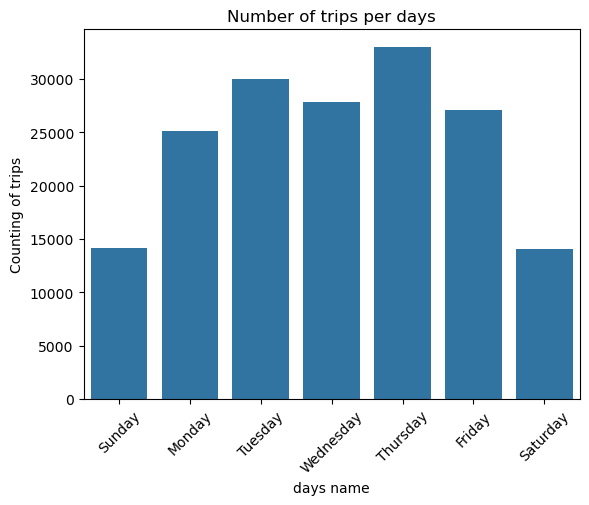

In [39]:
weekdays_in_order=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
sb.countplot(data=df,x='day_name',color=sb.color_palette()[0],order=weekdays_in_order)
plt.xticks(rotation=45)
plotting('days name','Counting of trips','Number of trips per days')

## Q2.How many Trips based on gender of rider?

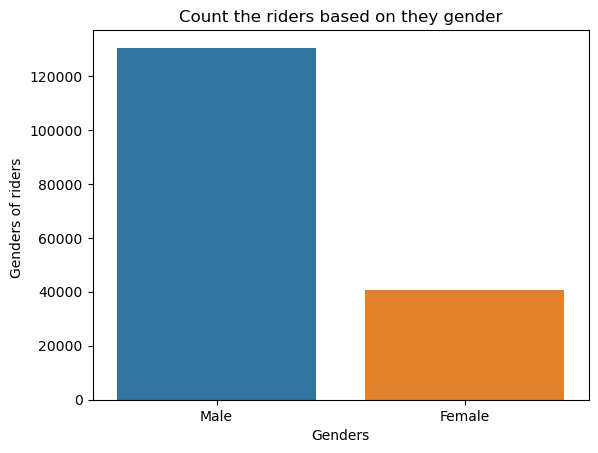

In [43]:
palette = ['#acaca4', '#7e7e87']
sb.countplot(data=df,x='member_gender')
plotting('Genders','Genders of riders ','Count the riders based on they gender')

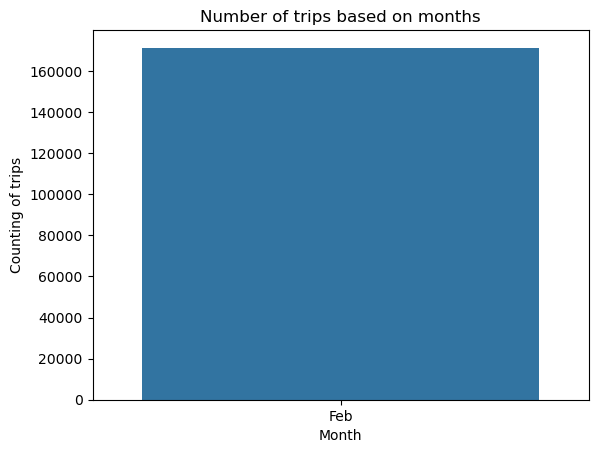

In [46]:
sb.countplot(data=df,x='month')
plotting('Month', 'Counting of trips', 'Number of trips based on months')


## Q3.What is the Avg. of duration of trips in minutes?

In [298]:
df.duration_min.describe()

count    171251.000000
mean         11.137231
std          26.292401
min           1.000000
25%           5.000000
50%           8.000000
75%          13.000000
max        1409.000000
Name: duration_min, dtype: float64

In [299]:
df[df['duration_min']>13].count()[0]

37433

<Axes: >

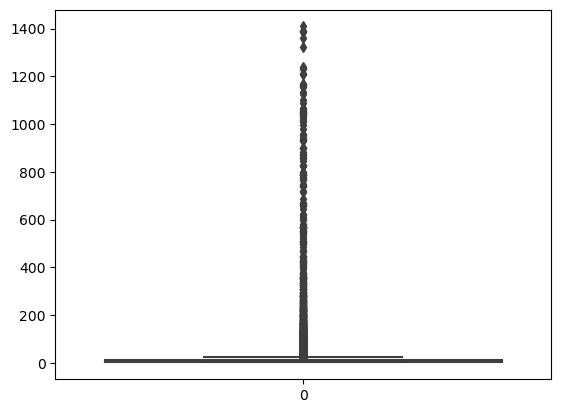

In [310]:
sb.boxplot(df.duration_min)

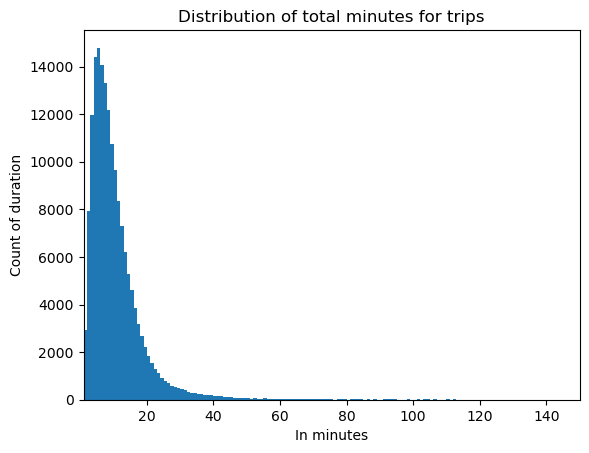

In [47]:
bins=np.arange(0, df['duration_min'].max()+0.1, 1)
plt.hist(df.duration_min,bins=bins)
plt.xlim(1,150)
plotting('In minutes', 'Count of duration', 'Distribution of total minutes for trips')

## Q4.How many trips for customr and subscriber

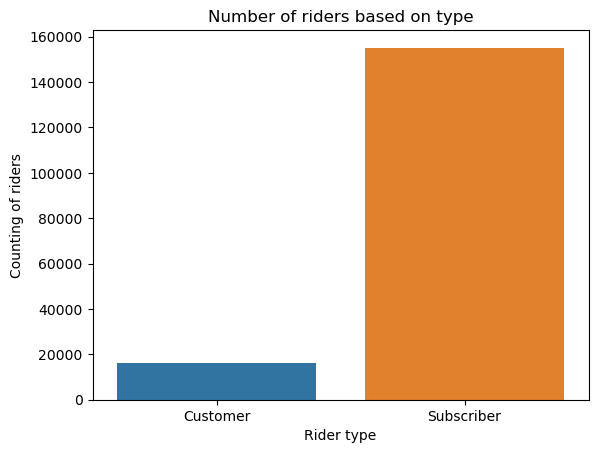

In [50]:
palette = ['#acaca4', '#7e7e87']
sb.countplot(data=df,x='user_type')
plotting('Rider type', 'Counting of riders', 'Number of riders based on type')

In [312]:
df.distance_km.describe()

count    171251.000000
mean          1.687446
std           1.093646
min           0.000000
25%           0.909141
50%           1.428159
75%           2.216852
max          69.465977
Name: distance_km, dtype: float64

## Q5.What is the Avg. of distance of trips in kilometer?

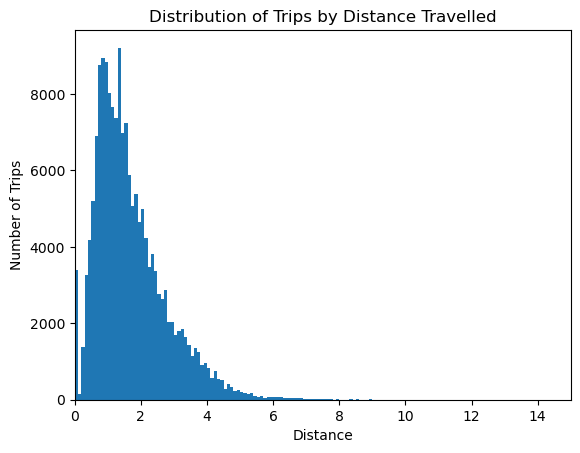

In [51]:
bins=np.arange(0, df['distance_km'].max()+0.1, 0.1)
plt.hist(data= df, x='distance_km', color= sb.color_palette()[0], bins=bins);
plotting('Distance', 'Number of Trips', 'Distribution of Trips by Distance Travelled')
plt.xlim(0, 15);

## Q6.What is the Distribution of birth date of riders?

In [315]:
df.member_birth_year.describe()

count    171251.000000
mean       1984.866231
std          10.003620
min        1901.000000
25%        1980.000000
50%        1987.000000
75%        1992.000000
max        2001.000000
Name: member_birth_year, dtype: float64

(1940.0, 2001.0)

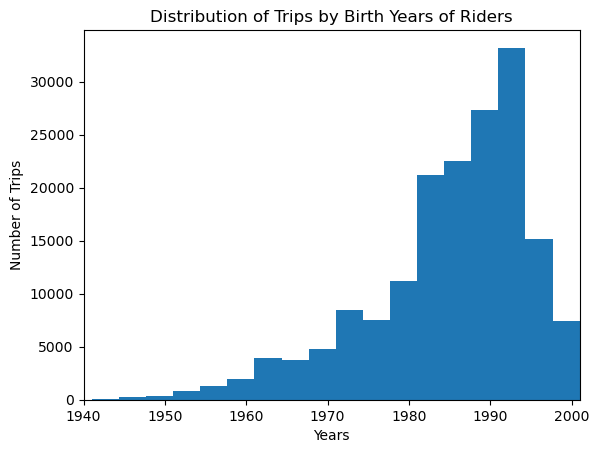

In [52]:
plt.hist(df.member_birth_year,bins=30)
plotting('Years', 'Number of Trips', 'Distribution of Trips by Birth Years of Riders')
plt.xlim(1940,2001)

## Observation 

>Thursday is the most popular day for riders to make a trip.

>The majority of riders are male, more than female by 70%.

>One of the weaknesses of the dataset is that there is only February. I observe that when I visualize the number of trips per 
month.

>The Distribution of duration of riding is from 1 to 60 mins approximately (skewed-Right)

>The Distribution of distance of riding is from 100 m to 8k km approximately (skewed-Right)

>The Distribution of birth-date of riders is from 1940's to 2001's (skewed-Left)

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I didn't made any transformations, just change the Numbers of bins in histograms and put limit to discard the outlire from distribution

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I added new features like distance that rider complete, convert the duration from seconds to minutes,extract the year and month and the day from star date

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

## Q7.what is the difference between  Customers and subscribers in the number of trips over the weekdays

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Sunday'),
  Text(1, 0, 'Monday'),
  Text(2, 0, 'Tuesday'),
  Text(3, 0, 'Wednesday'),
  Text(4, 0, 'Thursday'),
  Text(5, 0, 'Friday'),
  Text(6, 0, 'Saturday')])

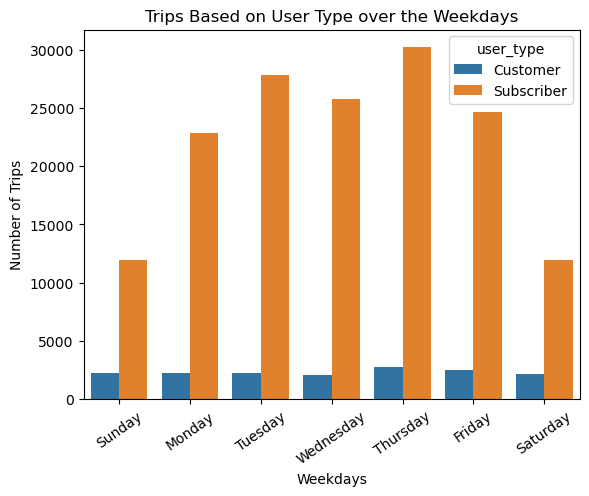

In [53]:
palette = ['#acaca4', '#7e7e87']
sb.countplot(data=df, x='day_name', hue='user_type',order=weekdays_in_order)
plotting('Weekdays', 'Number of Trips', 'Trips Based on User Type over the Weekdays')
plt.xticks(rotation=35)

## Q8.what is the difference between Male and Female in the number of trips based on user type?

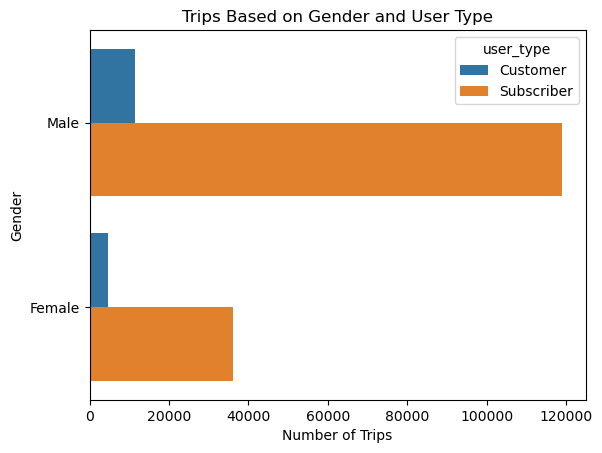

In [54]:
palette = ['#acaca4', '#7e7e87']
sb.countplot(data=df, y='member_gender', hue='user_type')
plotting('Number of Trips', 'Gender', 'Trips Based on Gender and User Type')

 ## Q9.what is the Avg. distance between the Starting streets ?


In [55]:
#get the each start st. with the median of distance in km 
distance_start=df.groupby('start_station_name')['distance_km'].median()
distance_start.sort_values(ascending=False,inplace=True)
distance_start=distance_start[:5]

In [56]:
names=list(distance_start.index)
names

['Williams Ave at Apollo St',
 'Williams Ave at 3rd St',
 'Parker Ave at McAllister St',
 'Mendell St at Fairfax Ave',
 'Lane St at Revere Ave']

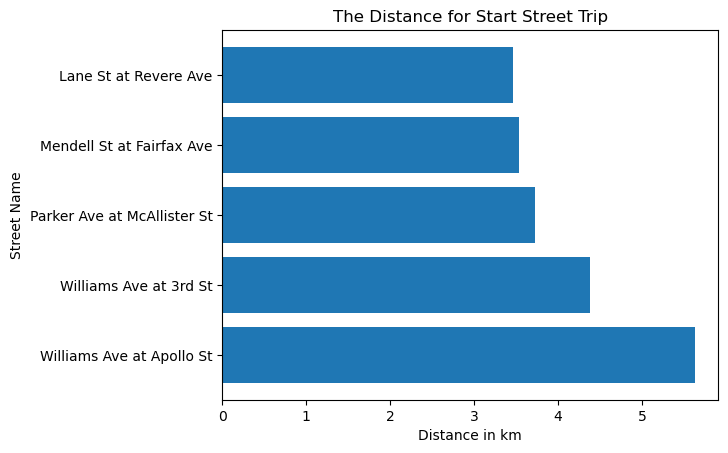

In [57]:
plt.barh(y=names, width=distance_start.values)
plotting('Distance in km', 'Street Name', 'The Distance for Start Street Trip')

 ## Q10.what is the Avg. distance between the Ending streets ?


In [58]:
#get the each start st. with the median of distance in km 
distance_end=df.groupby('end_station_name')['distance_km'].median()
distance_end.sort_values(ascending=False,inplace=True)
distance_end=distance_end[:5]

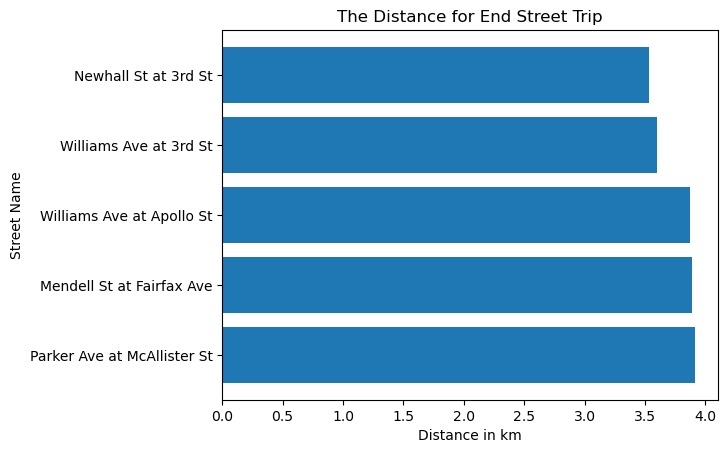

In [59]:
names=list(distance_end.index)
plt.barh(y=names, width=distance_end.values)
plotting('Distance in km', 'Street Name', 'The Distance for End Street Trip')

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The rider who's going to Parker Ave at McAllister St, Mendell St at Fairfax Ave, OR Williams Ave at Apollo St will need to ride for approximately 4 km.

>The rider who's starting his ride from Williams Ave. at Apollo St. will take more than 5 km to reach his destination!


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The lowest days by number of rides by subscribers are Sunday and Saturday.

>Male subscribers are the most common gender of subscribers.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [411]:
df.head()

,start_time,end_time,start_station_name,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,year,month,day_name,distance_km
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,1984,Male,No,869,2019,Feb,Thursday,0.543983
2,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,1972,Male,No,1030,2019,Feb,Thursday,2.705390
4,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,1974,Male,Yes,26,2019,Feb,Thursday,2.412017
5,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,Subscriber,1959,Male,No,29,2019,Feb,Thursday,3.328256
6,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,Palm St at Willow St,San Jose Diridon Station,Subscriber,1983,Female,No,19,2019,Feb,Thursday,2.029323


In [70]:
#getting the mean of distance in km and amount of time for trips for each variable that call this function
def data_by_distan_time(df,col):
   
    return df.groupby(col)[['duration_min','distance_km']].mean()
    

In [71]:
distan_time_by_age=data_by_distan_time(df,'member_birth_year')

In [72]:
distan_time_by_age.reset_index(inplace=True)

In [73]:
distan_time_by_age

,member_birth_year,duration_min,distance_km
0,1901,7.000000,1.070630
1,1902,8.000000,1.208832
2,1920,8.000000,1.418804
3,1927,8.000000,1.599309
4,1931,3.134831,0.643527
...,...,...,...
65,1997,10.365236,1.393472
66,1998,10.795113,1.315831
67,1999,10.239888,1.224995
68,2000,12.959354,1.406837


 ## Q11.what is the Distribution of duration and distance of trips based in birth date ?


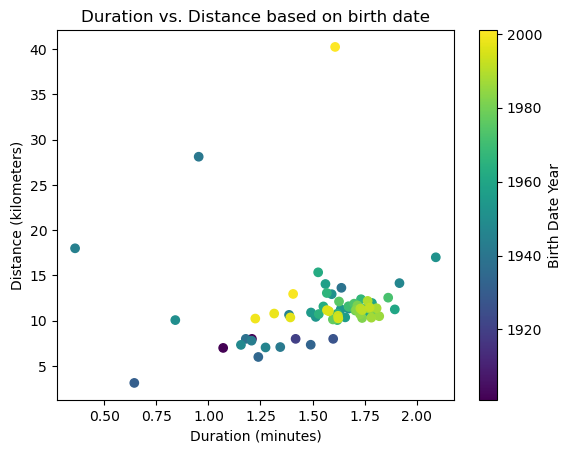

In [74]:
plt.scatter(time_dis_by_age.distance_km, time_dis_by_age.duration_min, c=time_dis_by_age.member_birth_year)

plt.colorbar(label='Birth Date Year')

plotting('Duration (minutes)','Distance (kilometers)','Duration vs. Distance based on birth date')
plt.show()

 ## Q12.what is the diffrence between Male and Female in duration and distance in trips ?

In [75]:
#getting the mean of distance in km and amount of time for trips for each gender
distan_time_by_gender=data_by_distan_time(df,'member_gender')

In [76]:
distan_time_by_gender.reset_index(inplace=True)

In [77]:
distan_time_by_gender

,member_gender,duration_min,distance_km
0,Female,12.488040,1.765882
1,Male,10.714724,1.662913


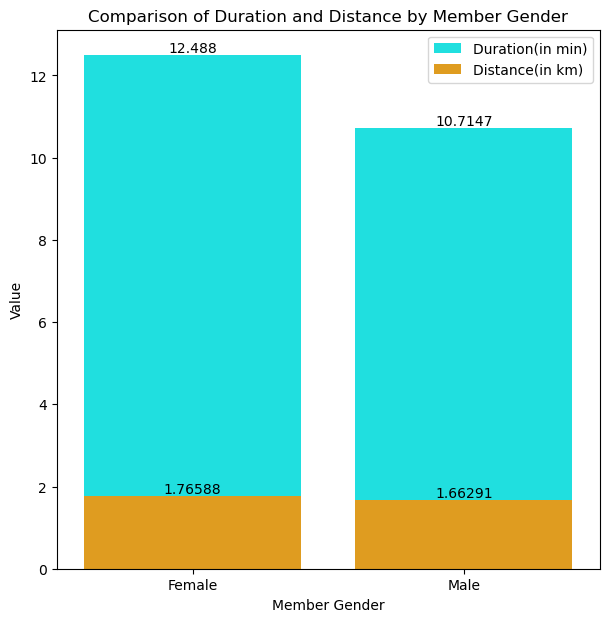

In [81]:
plt.figure(figsize=(7,7))


ax=sb.barplot(data=distan_time_by_gender, x="member_gender", y="duration_min", color="cyan", label="Duration(in min)")
ax=sb.barplot(data=distan_time_by_gender, x="member_gender", y="distance_km", color="orange", label="Distance(in km)")

# Add labels and title to the plot
plotting('Member Gender','Value','Comparison of Duration and Distance by Member Gender')

# Add a legend
plt.legend()

#write the values on top of each bar
for bars in ax.containers:
    ax.bar_label(bars)

# Show the plot
plt.show()

 ## Q13.what is the Distribution of duration and distance in trips based on weekdays ?


In [82]:
time_dis_day=data_by_distan_time(df,'day_name')

In [83]:
time_dis_day.reset_index(inplace=True)
time_dis_day

,day_name,duration_min,distance_km
0,Friday,10.781923,1.718391
1,Monday,11.030919,1.669283
2,Saturday,13.572594,1.614420
3,Sunday,13.606702,1.601811
4,Thursday,10.669052,1.720090
5,Tuesday,10.340798,1.707082
6,Wednesday,10.500467,1.694484


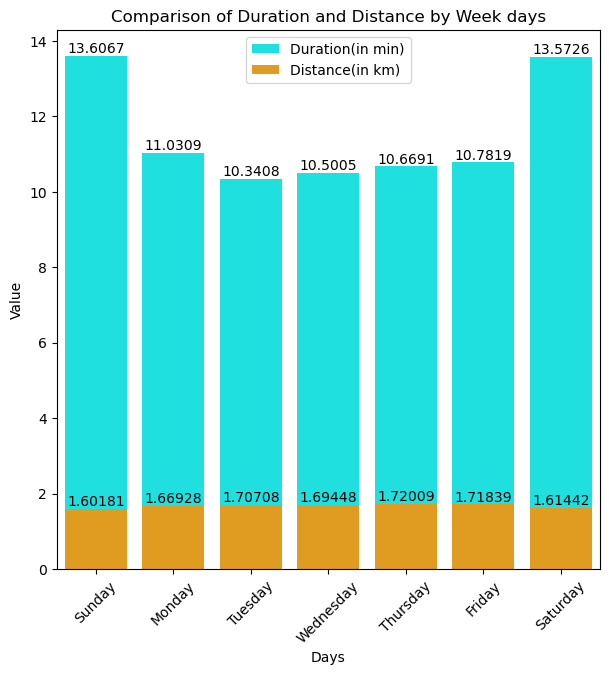

In [84]:
plt.figure(figsize=(7,7))


ax=sb.barplot(data=time_dis_day, x="day_name", y="duration_min", color="cyan", label="Duration(in min)",order=weekdays_in_order)
ax=sb.barplot(data=time_dis_day, x="day_name", y="distance_km", color="orange", label="Distance(in km)",order=weekdays_in_order)

# Add labels and title to the plot
plt.xlabel('Days')
plt.ylabel('Value')
plt.title('Comparison of Duration and Distance by Week days')

# Add a legend
plt.legend()
plt.xticks(rotation=45)

#write the values on top of each bar
for bars in ax.containers:
    ax.bar_label(bars)

# Show the plot
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>I compared the duration of trips and the distance with three variables: birth year, gender, and weekdays.

>I found the riders born between the 1960s and 1980s doing very well in duration and distance compared with others born in the 2000s.

>The female riders have taken 12.48 minutes to complete 1.7 km. On the other hand, the male riders took 10.7 minutes to complete 1.6 km.

>The riders take more time on their trips on Saturday and Sunday.

### Were there any interesting or surprising interactions between features?

> Actually, I'm surprised the older riders are doing very well compared with the younger riders.

## Conclusions
>Thursday is the most popular day for riders to make a trip. The majority of riders are male, outnumbering females by 70%. One limitation of the dataset is that it only includes data from February. The distribution of trip durations ranges from 1 to 60 minutes, with a right-skewed distribution. Similarly, the distribution of trip distances ranges from 100 meters to 8 kilometers, also skewed to the right. The birth dates of riders span from the 1940s to the 2000s, with a left-skewed distribution. Riders heading to Parker Ave at McAllister St, Mendell St at Fairfax Ave, or Williams Ave at Apollo St will travel approximately 4 kilometers. However, those starting their ride from Williams Ave at Apollo St will need to travel more than 5 kilometers to reach their destination. The days with the fewest rides by subscribers are Sunday and Saturday, with male subscribers being the most common gender. Comparing trip duration and distance with variables such as birth year, gender, and weekdays, it was found that riders born between the 1960s and 1980s performed better in terms of duration and distance compared to those born in the 2000s. Female riders took an average of 12.48 minutes to complete 1.7 kilometers, while male riders took 10.7 minutes to complete 1.6 kilometers. Finally, riders tend to take more time on their trips during Saturdays and Sundays.







In [524]:
df.to_csv('Ford_GoBike_Cleaned.csv',index=False)